# Gold Price Data -> Data Pre-processing -> Data Analysis -> Train Test Split -> Random Forest Regressor -> Evaluation

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collecting and Processing

In [3]:
gold_data=pd.read_csv('gld_price_data.csv')

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
gold_data.shape

(2290, 6)

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation
# Positive Correlation(directly proportion), Negative Correlation(Inversly proportion)

In [10]:
correlation = gold_data.corr()

<AxesSubplot:>

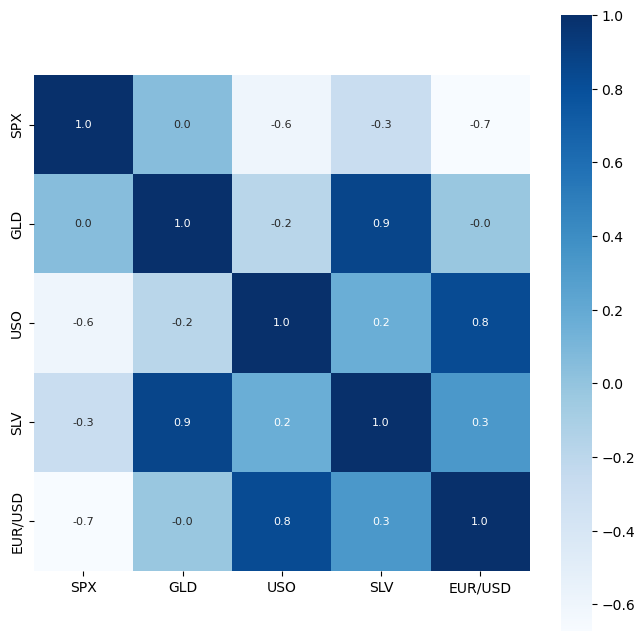

In [15]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,
           annot_kws={'size':8},cmap='Blues')

In [16]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

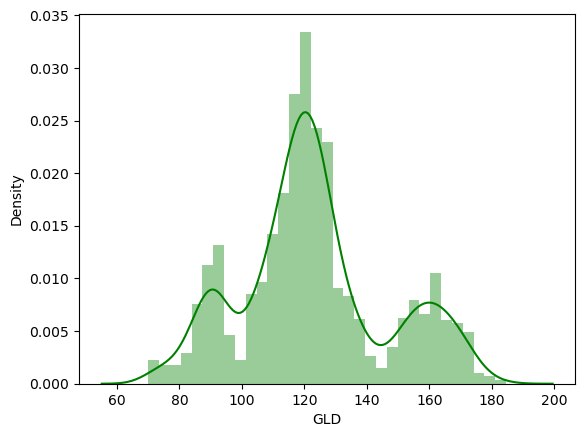

In [22]:
# checking the distribution of gold price
sns.distplot(gold_data['GLD'],color='green')

# Splitting the Features and Target

In [24]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [25]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [26]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting into training data nad test data

In [31]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size=0.2,random_state=2)

# Model Training- Random Tree Regressor

In [32]:
regressor = RandomForestRegressor(n_estimators=100)

In [33]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

# Model Evaluation

In [34]:
# predictionn on test data
test_data_prediction= regressor.predict(X_test)

In [35]:
print(test_data_prediction)

[168.44559892  81.88319997 116.06720031 127.78880088 120.60790135
 154.59579708 150.26599923 126.05430004 117.51119891 125.92810078
 116.86260068 172.39020082 141.26979851 167.79999844 115.16760013
 117.25640044 138.63640274 170.19070056 159.47360296 158.97499943
 155.19270014 125.32919988 175.3664001  157.03850359 125.32430066
  93.71959954  78.30240012 120.7074001  119.08719954 167.49569921
  88.30760027 125.31869988  91.09490077 117.63680022 121.12559867
 136.33930121 115.2555014  115.09620045 148.1443994  107.0693012
 104.69560255  87.23809809 126.39390064 117.79870011 154.44979891
 119.85830003 108.29389987 107.95789828  93.11360041 127.05739794
  74.67460056 113.77179938 121.15300023 111.17569941 118.81779882
 120.6025995  158.93960031 169.1141011  147.26729675  85.88179873
  94.13970033  86.80159892  90.69669999 118.97880046 126.37730095
 127.4292003  170.33399945 122.2365991  117.24759908  98.73090038
 168.81640081 142.74529823 132.27810264 121.18630185 120.61199969
 119.617601

In [37]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print("R Squared error:",error_score)

R Squared error: 0.9893258879474879


In [38]:
# Compare the Actual and Predicted Values in a plot
Y_test = list(Y_test)

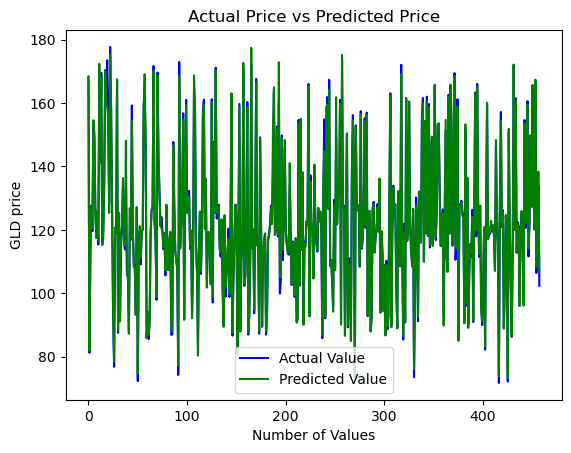

In [39]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD price')
plt.legend()
plt.show()